## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Importing the csv file

In [ ]:
df = pd.read_csv("/content/data1.csv")
df.head()

,date,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')
df.head()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [ ]:
df.describe()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000
mean,0.001611,0.001587,0.000650,0.000876,0.000601,0.000242,0.000921,0.000592,0.000907
std,0.016220,0.021082,0.013960,0.014459,0.012562,0.014736,0.015897,0.012892,0.010482
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006520,-0.009518,-0.004573,-0.006074,-0.005777,-0.007379,-0.007220,-0.005861,-0.004860
50%,0.002217,0.002742,0.000842,0.001322,0.000704,0.000000,0.000237,0.000477,0.000977
75%,0.010203,0.013495,0.006442,0.008216,0.007634,0.007992,0.008874,0.007765,0.006189
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


## **Ad Fuller test to check for Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
for i in range(len(df.columns)):
  results = adfuller(df[df.columns[i]])
  print('For the time series: {}'.format(df.columns[i]))
  print('Test statistic is: {} and p-value is: {}'.format(results[0],results[1]))
  if results[1]<=0.05:
    print("The time series {} is stationary".format(df.columns[i]))
  else:
    print("The time series {} is not stationary".format(df.columns[i]))
  print(' ')

For the time series: ISE
Test statistic is: -22.459616803357637 and p-value is: 0.0
The time series ISE is stationary
 
For the time series: ISE.1
Test statistic is: -21.23825449104866 and p-value is: 0.0
The time series ISE.1 is stationary
 
For the time series: SP
Test statistic is: -24.507998861382244 and p-value is: 0.0
The time series SP is stationary
 
For the time series: DAX
Test statistic is: -22.935828242530988 and p-value is: 0.0
The time series DAX is stationary
 
For the time series: FTSE
Test statistic is: -23.161333454967515 and p-value is: 0.0
The time series FTSE is stationary
 
For the time series: NIKKEI
Test statistic is: -24.802137440989725 and p-value is: 0.0
The time series NIKKEI is stationary
 
For the time series: BOVESPA
Test statistic is: -23.370886880819715 and p-value is: 0.0
The time series BOVESPA is stationary
 
For the time series: EU
Test statistic is: -22.791080460278394 and p-value is: 0.0
The time series EU is stationary
 
For the time series: EM
T

## Here we can see that all the time series are stationary
-------------------------------------------------------------------------------

### Causality shows that one variable directly effects a change in the other and hence is used in multivariate time series 
## **Checking for causality using Granger Causality test**
### Checking if other columns causes changes in ISE

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests


### 1. The data for test whether the time series in the second column Granger causes the time series in the first column.
### 2. If p<0.05 for all the 4 tests we can say that the 2nd column specified in the causality test causes ISE for that lag onwards



In [ ]:
for i in range(len(df.columns)-1):
  print("Does {} causes ISE? ".format(df.columns[i+1]))
  print('----------------------------------------------------------')
  results = grangercausalitytests(df[['ISE',df.columns[i+1]]],3)
  print(' ')

Does ISE.1 causes ISE? 
----------------------------------------------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1324  , p=0.7161  , df_denom=553, df_num=1
ssr based chi2 test:   chi2=0.1331  , p=0.7153  , df=1
likelihood ratio test: chi2=0.1331  , p=0.7153  , df=1
parameter F test:         F=0.1324  , p=0.7161  , df_denom=553, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0673  , p=0.9349  , df_denom=550, df_num=2
ssr based chi2 test:   chi2=0.1359  , p=0.9343  , df=2
likelihood ratio test: chi2=0.1359  , p=0.9343  , df=2
parameter F test:         F=0.0673  , p=0.9349  , df_denom=550, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6261  , p=0.5984  , df_denom=547, df_num=3
ssr based chi2 test:   chi2=1.9024  , p=0.5929  , df=3
likelihood ratio test: chi2=1.8992  , p=0.5936  , df=3
parameter F test:         F=0.6261  , p=0.5984  , df_denom=547, df_num=3
 
Does SP c

## After using the Granger Causality test we see that, SP and BOVESPA cause ISE, so we make a dataframe using these 3 time series

In [ ]:
data = df[['ISE','SP','BOVESPA']]
data.shape

(557, 3)

## **Train-Test Split**

In [ ]:
n = len(data)
p = round(n*0.90)
train_data = data.iloc[:p]
test_data = data.iloc[p:]
print(len(train_data),len(test_data))

501 56


# **Vector Auto Regressions**

In [ ]:
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.api import VAR

## Getting the best order for prediction

In [ ]:
model = VAR(train_data)
sorted_order = model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -26.11     -26.09*   4.568e-12     -26.10*
1      -26.14*      -26.03  4.448e-12*      -26.10
2       -26.11      -25.93   4.558e-12      -26.04
3       -26.11      -25.85   4.577e-12      -26.01
4       -26.11      -25.77   4.580e-12      -25.98
5       -26.10      -25.68   4.633e-12      -25.93
6       -26.07      -25.58   4.756e-12      -25.88
7       -26.04      -25.47   4.887e-12      -25.82
8       -26.04      -25.39   4.915e-12      -25.78
9       -26.03      -25.30   4.974e-12      -25.74
10      -26.02      -25.22   4.994e-12      -25.71
11      -26.01      -25.12   5.084e-12      -25.66
12      -26.00      -25.04   5.116e-12      -25.62
13      -25.98      -24.94   5.217e-12      -25.57
14      -25.98      -24.86   5.205e-12      -25.54
15      -25.97      -24.77   5.299e-12      -25.49
16      -25.96      -24.68   5.

### Here both AIC and FPE have shown the order 1 as minimum so we select the order as 1

In [ ]:
model = VARMAX(train_data,order=(1,0),enforce_stationarity=True)
ISE_model = model.fit(disp=False)
print(ISE_model.summary())

                              Statespace Model Results                              
Dep. Variable:     ['ISE', 'SP', 'BOVESPA']   No. Observations:                  501
Model:                               VAR(1)   Log Likelihood                4373.581
                                + intercept   AIC                          -8711.162
Date:                      Tue, 03 Aug 2021   BIC                          -8635.263
Time:                              12:32:21   HQIC                         -8681.382
Sample:                          01-05-2009                                         
                               - 12-06-2010                                         
Covariance Type:                        opg                                         
Ljung-Box (Q):          33.12, 49.59, 40.55   Jarque-Bera (JB):   33.00, 59.15, 55.19
Prob(Q):                   0.77, 0.14, 0.45   Prob(JB):              0.00, 0.00, 0.00
Heteroskedasticity (H):    0.56, 0.42, 0.51   Skew:            

## Getting the predictions

In [ ]:
predict_model = ISE_model.get_prediction(start=len(train_data),end=556)
ISE_prediction = predict_model.predicted_mean
ISE_prediction.columns = ['ISE_predicted','SP_predicted','BOVESPA_predicted']
ISE_prediction.head()

,ISE_predicted,SP_predicted,BOVESPA_predicted
2010-12-07,0.000403,0.000761,0.000624
2010-12-08,0.001880,0.000511,0.001166
2010-12-09,0.001865,0.000584,0.001107
2010-12-10,0.001862,0.000575,0.001109
2010-12-13,0.001862,0.000576,0.001109


## Concatenating the predicted and test values of ISE to visualise the data

In [ ]:
test_pred = pd.concat([test_data['ISE'],ISE_prediction['ISE_predicted']],axis=1)
test_pred.head()

,ISE,ISE_predicted
date,,
2010-12-07,0.002380,0.000403
2010-12-08,-0.002491,0.001880
2010-12-09,-0.026805,0.001865
2010-12-10,-0.017676,0.001862
2010-12-13,0.024729,0.001862


## Visualisations

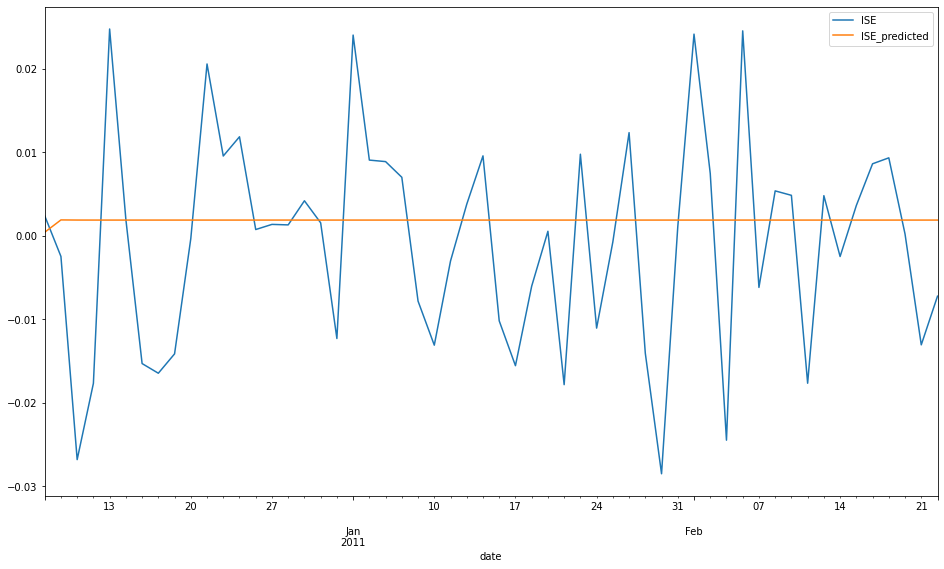

In [ ]:
test_pred.plot(figsize=(16,9))

## The predictions are correct as the time series data is white noise and cannot be predicted